In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
from ex8fun import *

In [2]:
data = loadmat('data/ex8data1.mat')
x = data['X']
x.shape

(307, 2)

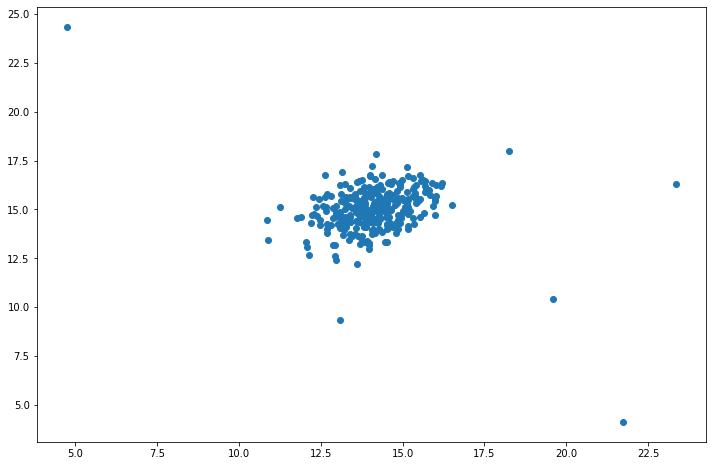

In [3]:
fig ,ax = plt.subplots(figsize = (12,8))

ax.scatter(x[:,0],x[:,1])
plt.show()

In [4]:
mu,sigma = estimate_gaussin(x)
mu,sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [5]:
xval = data['Xval']
yval = data['yval']
xval.shape,yval.shape

((307, 2), (307, 1))

In [6]:
from scipy import stats

dist = stats.norm(mu[0],sigma[0])

dist.pdf(15)

0.1935875044615038

In [7]:
dist.pdf(x[:,0])[0:50]

array([0.183842  , 0.20221694, 0.21746136, 0.19778763, 0.20858956,
       0.21652359, 0.16991291, 0.15123542, 0.1163989 , 0.1594734 ,
       0.21716057, 0.21760472, 0.20141857, 0.20157497, 0.21711385,
       0.21758775, 0.21695576, 0.2138258 , 0.21057069, 0.1173018 ,
       0.20765108, 0.21717452, 0.19510663, 0.21702152, 0.17429399,
       0.15413455, 0.21000109, 0.20223586, 0.21031898, 0.21313426,
       0.16158946, 0.2170794 , 0.17825767, 0.17414633, 0.1264951 ,
       0.19723662, 0.14538809, 0.21766361, 0.21191386, 0.21729442,
       0.21238912, 0.18799417, 0.21259798, 0.21752767, 0.20616968,
       0.21520366, 0.1280081 , 0.21768113, 0.21539967, 0.16913173])

In [8]:
p = np.zeros((x.shape[0],x.shape[1]))
p[:,0] = stats.norm(mu[0],sigma[0]).pdf(x[:,0])
p[:,1] = stats.norm(mu[1],sigma[1]).pdf(x[:,1])

p.shape

(307, 2)

In [9]:
pval = np.zeros((x.shape[0],x.shape[1]))
pval[:,0] = stats.norm(mu[0],sigma[0]).pdf(xval[:,0])
pval[:,1] = stats.norm(mu[1],sigma[1]).pdf(xval[:,1])

pval.shape

(307, 2)

In [10]:
epsilon, f1 = select_threshold(pval, yval)
epsilon, f1

d:\machine_learnings\code\ex8-anomaly detection and recommendation\ex8fun.py:50: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp / ( tp + fp)


(0.009566706005956842, 0.7142857142857143)

In [11]:
# indexes of the values considered to be outliers
outliers = np.where(p < epsilon)
outliers

(array([300, 301, 301, 303, 303, 304, 306, 306], dtype=int64),
 array([1, 0, 1, 0, 1, 0, 0, 1], dtype=int64))

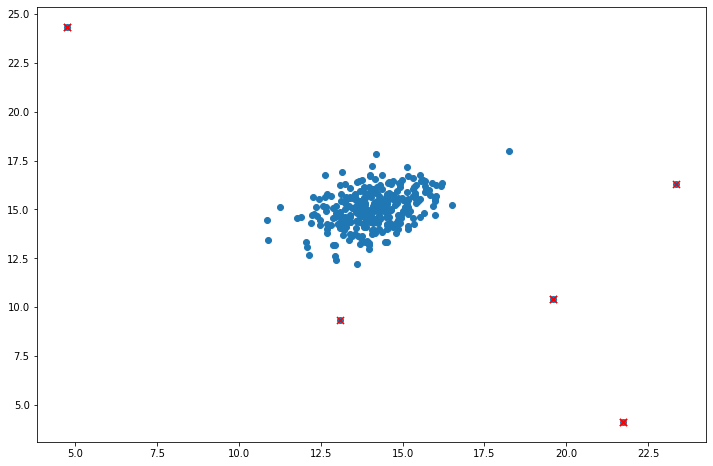

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x[:,0], x[:,1])
ax.scatter(x[outliers[0],0], x[outliers[0],1], s=50, color='r', marker='x')
plt.show()

In [13]:
data = loadmat('data/ex8_movies.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 17:19:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Y': array([[5, 4, 0, ..., 5, 0, 0],
        [3, 0, 0, ..., 0, 0, 5],
        [4, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'R': array([[1, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [14]:
y = data['Y']
r = data['R']
y.shape,r.shape

((1682, 943), (1682, 943))

In [15]:
y[1,np.where(r[1,:] == 1)[0]].mean()

3.2061068702290076

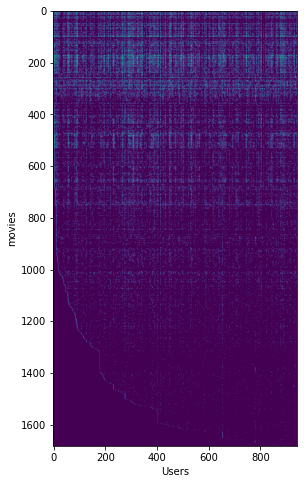

In [16]:
fig,ax = plt.subplots(figsize = (12,8))

ax.imshow(y)
ax.set_xlabel("Users")
ax.set_ylabel("movies")
# fig.tight_layout()
plt.show()

In [17]:
params_data = loadmat('data/ex8_movieParams.mat')
x = params_data['X']
theta = params_data['Theta']
x.shape, theta.shape

((1682, 10), (943, 10))

In [18]:
user = 4
movies = 5
features = 3

x_sub = x[:movies,:features]
theta_sub = theta[:user,:features]
y_sub = y[:movies,:user]
r_sub = r[:movies,:user]

In [19]:
params = np.concatenate((np.ravel(x_sub),np.ravel(theta_sub)))
cost(params,y_sub,r_sub,features)

(22.224603725685675,
 array([ -2.52899165,   7.57570308,  -1.89979026,  -0.56819597,
          3.35265031,  -0.52339845,  -0.83240713,   4.91163297,
         -0.76677878,  -0.38358278,   2.26333698,  -0.35334048,
         -0.80378006,   4.74271842,  -0.74040871, -10.5680202 ,
          4.62776019,  -7.16004443,  -3.05099006,   1.16441367,
         -3.47410789,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]))

In [20]:
J, grad = cost(params, y_sub, r_sub, features)
J, grad

(22.224603725685675,
 array([ -2.52899165,   7.57570308,  -1.89979026,  -0.56819597,
          3.35265031,  -0.52339845,  -0.83240713,   4.91163297,
         -0.76677878,  -0.38358278,   2.26333698,  -0.35334048,
         -0.80378006,   4.74271842,  -0.74040871, -10.5680202 ,
          4.62776019,  -7.16004443,  -3.05099006,   1.16441367,
         -3.47410789,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]))

In [21]:
J, grad = cost(params, y_sub, r_sub, features, 1.5)
J, grad

(31.34405624427422,
 array([ -2.52899165,   7.57570308,  -1.89979026,  -0.56819597,
          3.35265031,  -0.52339845,  -0.83240713,   4.91163297,
         -0.76677878,  -0.38358278,   2.26333698,  -0.35334048,
         -0.80378006,   4.74271842,  -0.74040871, -10.5680202 ,
          4.62776019,  -7.16004443,  -3.05099006,   1.16441367,
         -3.47410789,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]))

In [27]:
movie_idx = {}

f = open('data/movie_ids.txt',encoding = 'gbk')
for line in f:
    tokens = line.split(' ')
    tokens[-1] = tokens[-1][:-1]
    movie_idx[int(tokens[0]) - 1] = ' '.join(tokens[1:])

In [28]:
movie_idx[0]

'Toy Story (1995)'

In [30]:
ratings = np.zeros((1682,1))
ratings[0] = 4
ratings[6] = 3
ratings[11] = 5
ratings[53] = 4
ratings[63] = 5
ratings[65] = 3
ratings[68] = 5
ratings[97] = 2
ratings[182] = 4
ratings[225] = 5
ratings[354] = 5

In [31]:
r = data['R']
y = data['Y']

y = np.append(y,ratings,axis=1)
r = np.append(r,ratings != 0,axis = 1)

In [32]:
movies = y.shape[0]  # 1682
users = y.shape[1]  # 944
features = 10
learning_rate = 10.

x = np.random.random(size=(movies, features))
theta = np.random.random(size=(users, features))
params = np.concatenate((np.ravel(x), np.ravel(theta)))

x.shape, theta.shape, params.shape

((1682, 10), (944, 10), (26260,))

In [34]:
ymean = np.zeros((movies,1))
ynorm = np.zeros((movies,users))
for i in range(movies):
    idx = np.where(r[i,:] == 1)[0]
    ymean[i] = y[i,idx].mean()
    ynorm[i,idx] = y[i,idx] - ymean[i]


In [36]:
from scipy.optimize import minimize

fmin = minimize(fun=cost, x0=params, args=(ynorm, r, features, learning_rate), 
                method='CG', jac=True, options={'maxiter': 100})
fmin

     fun: 57395.34316041881
     jac: array([ 8.43537422,  6.78536125,  6.43953217, ...,  0.03657655,
       -0.64624553,  0.43497287])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 67
     nit: 14
    njev: 55
  status: 2
 success: False
       x: array([ 0.56870855,  0.44783552, -0.08201324, ...,  0.84554142,
        0.61615708,  0.25094153])

In [41]:
x = np.matrix(np.reshape(fmin.x[:movies * features], (movies, features)))
theta = np.matrix(np.reshape(fmin.x[movies * features:], (users, features)))

In [42]:
x.shape, theta.shape

((1682, 10), (944, 10))

In [43]:
predictions = x * theta.T 
my_preds = predictions[:, -1] + ymean
my_preds.shape

(1682, 1)

In [48]:
sorted_preds = np.sort(my_preds, axis=0)[::]
sorted_preds[:10]


matrix([[1.87738097],
        [1.97957782],
        [2.06818019],
        [2.06974146],
        [2.08844009],
        [2.18246751],
        [2.20666814],
        [2.2442688 ],
        [2.27747837],
        [2.32424255]])

In [47]:
idx = np.argsort(my_preds, axis=0)[::-1]
idx

matrix([[1598],
        [1121],
        [1200],
        ...,
        [1373],
        [ 423],
        [1431]], dtype=int64)